### Chapter One: Probability Calculation

This part introduce various probability distributions, such as Binomial distribution, Poisson distribution, Normal distribution and so on.

In [2]:
from scipy import stats

In [10]:
# Binomial distribution 二项分布
'''
calculate probability of Binomial distribution using module of scipy

假设有6个顾客进入某服装店，任一顾客购买的概率是0.30。计算下列事件的概率
1.恰有4个顾客购买
2.购买的顾客不超过一半
3.至少有1个顾客购买
'''

n = 6
p = 0.3

# 1.恰有4个顾客购买
k = 4
prob_4_purchase = stats.binom.pmf(k, n, p)
print('恰有4个顾客购买的概率是{:.6f}'.format(prob_4_purchase))    # 计算结果保留6位小数

# 购买的顾客不超过一半
k = 3
prob_less_3_purchase = stats.binom.cdf(k, n, p)
print('购买的顾客不超过一半的概率是{:.6f}'.format(prob_less_3_purchase))

# 至少有1个顾客购买
k = 0
prob_more_1_purchase = 1 - stats.binom.cdf(k, n, p)
print('至少有1个顾客购买的概率是{:.6f}'.format(prob_more_1_purchase))

恰有4个顾客购买的概率是0.059535
购买的顾客不超过一半的概率是0.929530
至少有1个顾客购买的概率是0.882351


### 泊松分布
描述单位时间（或空间）内随机事件发生的次数

In [11]:
# Poisson distribution 泊松分布
'''
calculate probability of Poisson distribution using module of scipy

某航空公司的订票处每60分钟有48次电话。求5分钟内接到3次电话的概率
'''

x = 3
# 单位时间（平均每分钟）发生的次数是48/60, 单位时间（5分钟）发生的次数mu=(48/60) * 5 
mu = (48/60) * 5    
prob_poisson_5_3 = stats.poisson.pmf(x, mu)
print('5分钟内接到3次电话的概率: {:.6f}'.format(prob_poisson_5_3))

5分钟内接到3次电话的概率: 0.195367


### 超几何分布
描述了从有限N个物件（其中包含M个指定种类的物件）中抽出n个物件，成功抽出该指定种类的物件的次数（不放回），称为超几何分布。

超几何分布中的参数是M,N,n，上述超几何分布记作X~H(n,M,N)。

In [19]:
# Hypergeometric distribution 超几何分布
'''
10人中，6人喜欢可口可乐，4人喜欢百事可乐，从这些人中选出一个3人的随机样本。求
1.恰有2人喜欢可口可乐的概率是多少？
2.2或3个人喜欢百事可乐的概率是多少？
'''

# 共有M=10人，其中n=6人喜欢可口可乐，抽出N=3人的随机样本
M = 10
N = 3
n = 6

# 1.恰有2人喜欢可口可乐的概率是多少？
k1 = 2
prob_hyper_2_coca = stats.hypergeom.pmf(k1, M, n, N)
print('恰有2人喜欢可口可乐的概率是: {:.20f}'.format(prob_hyper_2_coca))

# 2或3个人喜欢百事可乐的概率是多少？
k1 = 2
k2 = 3
n2 = 4
prob_hyper_23_pesci = stats.hypergeom.pmf(k1, M, n2, N) + stats.hypergeom.pmf(k2, M, n2, N)
print('2或3个人喜欢百事可乐的概率是: {:.8f}'.format(prob_hyper_23_pesci))

恰有2人喜欢可口可乐的概率是: 0.49999999999999972244
2或3个人喜欢百事可乐的概率是: 0.33333333


### 正态分布

若随机变量X服从一个数学期望为μ、方差为σ2的正态分布，记为N(μ，σ2)。其概率密度函数为正态分布的期望值μ决定了其位置，其标准差σ决定了分布的幅度。当μ = 0,σ = 1时的正态分布是标准正态分布。

正态曲线呈钟型，两头低，中间高，左右对称.

In [23]:
# Normal distribution 正态分布
'''
人们第一次结婚的平均年龄是26岁。假设第一次结婚的年龄为正态分布，标准差为4年。求
1.一个人第一次结婚时的年龄小于23岁的概率多大？
2.一个人第一次结婚时的年龄在20-30岁之间的概率多大？
3.95%的人在什么年龄前第一次结婚
'''

mu = 26
sigma = 4

# 一个人第一次结婚时的年龄小于23岁的概率多大
x1 = 23
prob_normal_less_23 = stats.norm.cdf(x1, mu, sigma)
print('一个人第一次结婚时的年龄小于23岁的概率是：{:.8f}'.format(prob_normal_less_23))

# 2.一个人第一次结婚时的年龄在20-30岁之间的概率多大
x2 = 20
x3 = 30
prob_norm_20_30 = stats.norm.cdf(x3, mu, sigma) - stats.norm.cdf(x2, mu, sigma)
print('一个人第一次结婚时的年龄在20-30岁之间的概率是：{:.8f}'.format(prob_norm_20_30))

# 95%的人在什么年龄前第一次结婚
x4 = 0.95
prob_norm_95_perc = stats.norm.ppf(x4, mu, sigma)
print('95%的人第一次结婚是在什么年龄前：{:.8f}'.format(prob_norm_95_perc))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

一个人第一次结婚时的年龄小于23岁的概率是：0.22662735
一个人第一次结婚时的年龄在20-30岁之间的概率是：0.77453754
95%的人第一次结婚是在什么年龄前：32.57941451


In [25]:
# Chi-Square distribution卡方分布
# use function of scipy.stats.chi2

from scipy import stats

'''
stats.chi2.cdf(x, n)    # cdf返回随机变量X小于x的累积概率，即P(X<x)
stats.chi2.pdf(x, n)    # pdf返回随机变量X在x处的概率密度
'''

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

'\nstats.chi2.cdf(x, n)    # cdf返回随机变量X小于x的累积概率，即P(X<x)\nstats.chi2.pdf(x, n)    # pdf返回随机变量X在x处的概率密度\n'

In [ ]:
# t-distribution t分布
# use function of scipy.stats.t

from scipy import stats
stats.t.cdf(x,n)
stats.t.pdf(x,n)

# x为需要计算概率的数值(>0)，n表示自由度

In [ ]:
# f-distribution F分布

from scipy import stats
stats.f.cdf(x,m,n)
stats.f.pdf(x,m,n)

'''
x：用来计算F分布的概率数值
m：分子自由度
n：分母自由度

cdf返回随机变量X小于x的累积概率，即P(X<x)
pdf返回随机变量X在x处的概率密度

'''

In [26]:
# Permutation and Combination 排列组合
# n个人，求至少两人生日相同（设为事件A）的概率

import math
from scipy import special

# 假设有64个同学，即 n=64
n = 64
prob = 1 - special.comb(365,n) * math.factorial(n) / 365 ** n
prob
# 说明只要有64人，那么至少有2人生日相同概率几乎为1

0.997190478966976

### Chapter Two: Random Sampling

In [27]:
# Create random numbers using a random number generator
'''
创建取值分别为1，2，,3,4，
相应概率为0.3,0.2,0.1,0.4的概率分布下，15行8列的离散分布随机数表
'''

import numpy as np
np.random.choice([1,2,3,4], size=(15,8), p=[0.3,0.2,0.1,0.4])

array([[4, 4, 4, 4, 4, 2, 2, 2],
       [2, 3, 4, 3, 1, 2, 1, 1],
       [1, 1, 4, 3, 1, 4, 4, 4],
       [4, 2, 2, 1, 4, 1, 1, 1],
       [4, 4, 4, 1, 4, 4, 1, 1],
       [2, 4, 2, 4, 1, 4, 4, 4],
       [3, 4, 2, 4, 4, 4, 3, 1],
       [3, 3, 4, 4, 4, 4, 1, 2],
       [4, 2, 1, 4, 2, 4, 2, 4],
       [2, 1, 3, 4, 4, 1, 4, 2],
       [2, 1, 1, 3, 4, 2, 1, 1],
       [2, 3, 4, 4, 3, 2, 3, 4],
       [2, 4, 3, 3, 4, 3, 3, 4],
       [4, 2, 2, 2, 4, 3, 4, 2],
       [4, 1, 1, 2, 2, 1, 2, 2]])

In [28]:
# Create random numbers using random number function
# 创建一组服从0-1均匀分布的随机数
np.random.rand(4,4)

array([[0.88134408, 0.81009186, 0.55969067, 0.21970673],
       [0.98460585, 0.70922827, 0.13757531, 0.07770564],
       [0.65117891, 0.07334929, 0.29029178, 0.25174905],
       [0.14465864, 0.43831573, 0.19108814, 0.97561161]])

In [29]:
# 创建一个均匀分布的，48个在[100,150)中的随机数
np.random.uniform(100,150,48)

array([128.81090018, 124.07970347, 130.80537281, 142.31284907,
       129.06232833, 144.68468028, 110.54648013, 104.71233315,
       116.33200741, 122.29468789, 117.26390381, 130.59673133,
       130.97967225, 106.04847135, 135.80532916, 141.48016803,
       143.4636337 , 133.48808672, 129.83757727, 102.74127923,
       133.04912336, 135.33980806, 138.46122408, 132.22605769,
       147.77705629, 147.03090868, 136.79240427, 111.43290184,
       109.36466261, 139.5198694 , 119.9625349 , 110.69358788,
       125.15528375, 130.53310856, 106.45571758, 133.39421453,
       146.73482545, 111.03521199, 122.7996789 , 128.76663231,
       138.18450528, 130.57057923, 123.34173272, 129.20920495,
       146.88909289, 103.07513389, 126.72881241, 138.13342541])

In [30]:
# Simulation of normal distribution 正态分布的模拟

%matplotlib inline
import matplotlib.pyplot as plt

# loc参数代表均值，scale代表标准差，size代表数量
sample = np.random.normal(loc=0, scale=1, size=2000)
sample

array([ 0.40306592,  0.62687296, -1.34688678, ..., -1.0852474 ,
       -0.40991626,  0.01941684])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  2.,  4.,  4.,
         5.,  3.,  5., 12.,  5., 12., 19., 25., 24., 34., 38., 37., 39.,
        51., 44., 61., 60., 66., 69., 72., 85., 78., 75., 79., 82., 82.,
        96., 67., 72., 66., 74., 58., 56., 58., 42., 34., 27., 32., 27.,
        25., 22., 14.,  9.,  8.,  7.,  5.,  5.,  4.,  3.,  5.,  0.,  2.,
         1.,  1.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
        -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
        -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
        -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
        -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
        -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, 

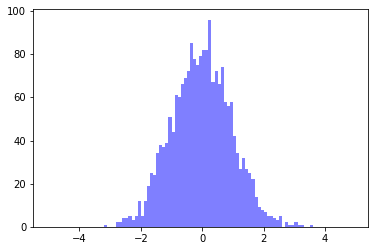

In [31]:
bins = np.arange(-5,5,0.1)
plt.hist(sample,bins,color='blue',alpha=0.5)